# Generation of training and testing data from BESOS
****
- Data source: Dr. Michel Curé, IFA UV



## Needed libraries

In [4]:
import glob
import numpy as np
import pandas as pd


## Functions 

In [5]:
def string2params(string, show=True):
    s1 = string.partition("g")
    t = s1[0][1:]
    s2 = s1[2].partition("v")
    g = s2[0]
    v = s2[-1]
    if show:
        print(s1)
        print("t:",t)
        print(s2)
        print("g: ",float(g)/10)
        print("v:", v)
    return float(t), float(g)/10, float(v)

t,g,v = string2params("t31000g25v60")
y_ = np.array([float(t),float(g),float(v)])

print(y_)


('t31000', 'g', '25v60')
t: 31000
('25', 'v', '60')
g:  2.5
v: 60
[3.1e+04 2.5e+00 6.0e+01]


In [6]:
files = glob.glob('BESOS/2_Be_stars/HD10144/BESS/*.txt')
m = len(files)
print(m)
y = np.zeros((m,4))

for i,name in enumerate(files):
    file_name = name.split("/")[-1].split(".")[0]
    #print(file_name)
    #t,g,v = string2params(file_name)
    #y[i] = t,g,v,0
    #print("----")

29


## Plotting an arbitrary model

In [7]:
df = pd.read_csv("BESOS/2_Be_stars/HD10144/BESS/HD10144_2010-09-03_01-50-22-00_LHIRES_III_6563_corr.txt", sep="    ", header=None)

<ipython-input-7-8753b0c4b032>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("BESOS/2_Be_stars/HD10144/BESS/HD10144_2010-09-03_01-50-22-00_LHIRES_III_6563_corr.txt", sep="    ", header=None)


In [8]:
df = pd.read_csv("BESOS/2_Be_stars/HD33328/PUCHEROS/hd33328_2013-02-26_00-55-34_final_corr.txt", sep="\t", header=None)

In [9]:
m1 = df[0] >= 4450
m2 = df[0] <= 4490

In [10]:
df2 = df[m1][m2]

<ipython-input-10-41c0d08820da>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[m1][m2]


In [11]:
df3 = pd.read_csv("models/t20000g35v190.dat", sep=" ", header=None)
m3 = df3[0] >= 4450
m4 = df3[0] <= 4490

df4 = df3[m3][m4]

<ipython-input-11-b9a48e541ba0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df4 = df3[m3][m4]


In [12]:
from matplotlib import pyplot as plt

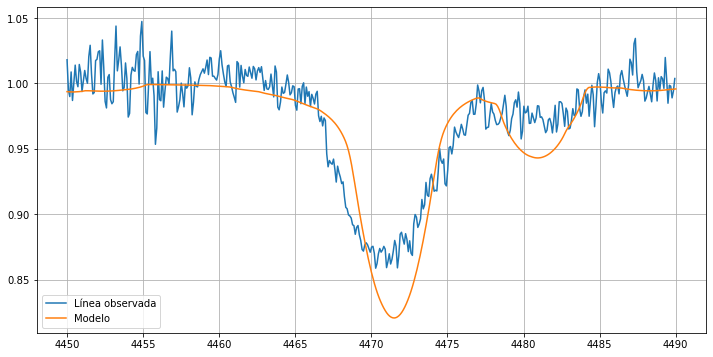

In [14]:
plt.figure(figsize=(12,6))
#df2.plot(x=0, y=1)
#df4.plot(x=0, y=1)
plt.plot(df2[0], df2[1], label="Línea observada")
plt.plot(df4[0], df4[1], label="Modelo")
plt.grid()
plt.legend(loc="best")
plt.show()

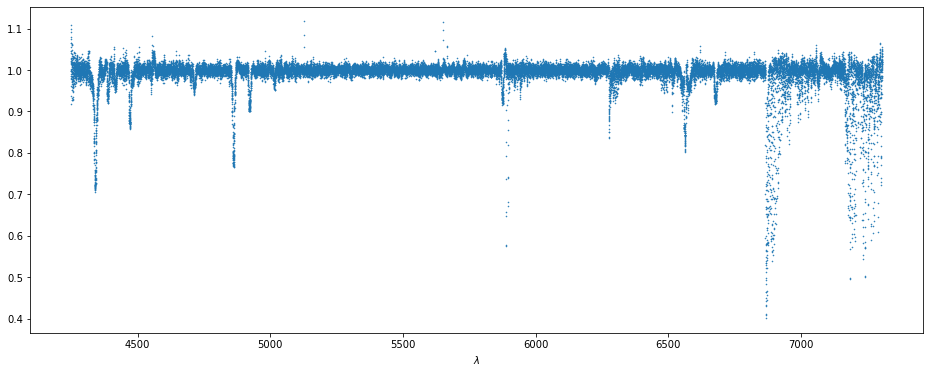

In [15]:
plt.figure(figsize=(16,6))
plt.xlabel("$\lambda$")
plt.scatter(df[0],df[1],s=0.3)
plt.show()